## from https://web.stanford.edu/~boyd/papers/admm/

# Code

In [1]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/quadprog/quadprog.html")


code =

    'function [z, history] = quadprog(P, q, r, lb, ub, rho, alpha)
     % quadprog  Solve standard form box-constrained QP via ADMM
     %
     % [x, history] = quadprog(P, q, r, lb, ub, rho, alpha)
     % 
     % Solves the following problem via ADMM:
     % 
     %   minimize     (1/2)*x'*P*x + q'*x + r
     %   subject to   lb <= x <= ub
     % 
     % The solution is returned in the vector x.
     %
     % history is a structure that contains the objective value, the primal and 
     % dual residual norms, and the tolerances for the primal and dual residual 
     % norms at each iteration.
     % 
     % rho is the augmented Lagrangian parameter. 
     %
     % alpha is the over-relaxation parameter (typical values for alpha are 
     % between 1.0 and 1.8).
     %
     %
     % More information can be found in the paper linked at:
     % http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
     %
     
     t_start = tic;
     
     %% Global constants a

In [2]:
%%file quadprog.m

function [z, history] = quadprog(P, q, r, lb, ub, rho, alpha)
% quadprog  Solve standard form box-constrained QP via ADMM
%
% [x, history] = quadprog(P, q, r, lb, ub, rho, alpha)
%
% Solves the following problem via ADMM:
%
%   minimize     (1/2)*x'*P*x + q'*x + r
%   subject to   lb <= x <= ub
%
% The solution is returned in the vector x.
%
% history is a structure that contains the objective value, the primal and
% dual residual norms, and the tolerances for the primal and dual residual
% norms at each iteration.
%
% rho is the augmented Lagrangian parameter.
%
% alpha is the over-relaxation parameter (typical values for alpha are
% between 1.0 and 1.8).
%
%
% More information can be found in the paper linked at:
% http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
%

t_start = tic;

%% Global constants and defaults

QUIET    = 0;
MAX_ITER = 1000;
ABSTOL   = 1e-4;
RELTOL   = 1e-2;

%% Data preprocessing

n = size(P,1);

%% ADMM solver

x = zeros(n,1);
z = zeros(n,1);
u = zeros(n,1);

if ~QUIET
    fprintf('%3s\t%10s\t%10s\t%10s\t%10s\t%10s\n', 'iter', ...
      'r norm', 'eps pri', 's norm', 'eps dual', 'objective');
end

for k = 1:MAX_ITER

    if k > 1
        x = R \ (R' \ (rho*(z - u) - q));
    else
        R = chol(P + rho*eye(n));
        x = R \ (R' \ (rho*(z - u) - q));
    end

    % z-update with relaxation
    zold = z;
    x_hat = alpha*x +(1-alpha)*zold;
    z = min(ub, max(lb, x_hat + u));

    % u-update
    u = u + (x_hat - z);

    % diagnostics, reporting, termination checks
    history.objval(k)  = objective(P, q, r, x);

    history.r_norm(k)  = norm(x - z);
    history.s_norm(k)  = norm(-rho*(z - zold));

    history.eps_pri(k) = sqrt(n)*ABSTOL + RELTOL*max(norm(x), norm(-z));
    history.eps_dual(k)= sqrt(n)*ABSTOL + RELTOL*norm(rho*u);

    if ~QUIET
        fprintf('%3d\t%10.4f\t%10.4f\t%10.4f\t%10.4f\t%10.2f\n', k, ...
            history.r_norm(k), history.eps_pri(k), ...
            history.s_norm(k), history.eps_dual(k), history.objval(k));
    end

    if (history.r_norm(k) < history.eps_pri(k) && ...
       history.s_norm(k) < history.eps_dual(k))
         break;
    end
end

if ~QUIET
    toc(t_start);
end
end

function obj = objective(P, q, r, x)
    obj = 0.5*x'*P*x + q'*x + r;
end

Created file '/home/wenh06/Jupyter/wenhao/workspace/fl_seminar/code/boyd-admm/quadprog.m'.


# Example

In [3]:
eg_code = grabcode("https://web.stanford.edu/~boyd/papers/admm/quadprog/quadprog_example.html")


eg_code =

    '% Standard form QP example
     
     %% Generate problem data
     randn('state', 0);
     rand('state', 0);
     
     n = 100;
     
     % generate a well-conditioned positive definite matrix
     % (for faster convergence)
     P = rand(n);
     P = P + P';
     [V D] = eig(P);
     P = V*diag(1+rand(n,1))*V';
     
     q = randn(n,1);
     r = randn(1);
     
     l = randn(n,1);        
     u = randn(n,1);        
     lb = min(l,u);
     ub = max(l,u);
     
     %% Solve problem
     
     [x history] = quadprog(P, q, r, lb, ub, 1.0, 1.0);
     
     %% Reporting
     K = length(history.objval);                                                                                                        
     
     h = figure;
     plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2); 
     ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');
     
     g = figure;
     subplot(2,1,1);                                                                           

### Generate problem data

In [4]:
randn('state', 0);
rand('state', 0);

n = 100;

% generate a well-conditioned positive definite matrix
% (for faster convergence)
P = rand(n);
P = P + P';
[V D] = eig(P);
P = V*diag(1+rand(n,1))*V';

q = randn(n,1);
r = randn(1);

l = randn(n,1);
u = randn(n,1);
lb = min(l,u);
ub = max(l,u);

### Solve problem

In [5]:
[x history] = quadprog(P, q, r, lb, ub, 1.0, 1.0);

iter	    r norm	   eps pri	    s norm	  eps dual	 objective
  1	    5.4585	    0.0508	    4.9772	    0.0556	    -23.62
  2	    2.0050	    0.0546	    0.8151	    0.0734	    -10.06
  3	    1.2096	    0.0558	    0.2823	    0.0845	     -4.36
  4	    0.7197	    0.0562	    0.1188	    0.0912	     -0.39
  5	    0.4287	    0.0564	    0.0578	    0.0952	      2.14
  6	    0.2564	    0.0564	    0.0331	    0.0976	      3.70
  7	    0.1541	    0.0564	    0.0199	    0.0990	      4.64
  8	    0.0931	    0.0564	    0.0120	    0.0999	      5.21
  9	    0.0566	    0.0564	    0.0073	    0.1004	      5.55
 10	    0.0345	    0.0564	    0.0044	    0.1007	      5.75
 0.025161 


### Reporting

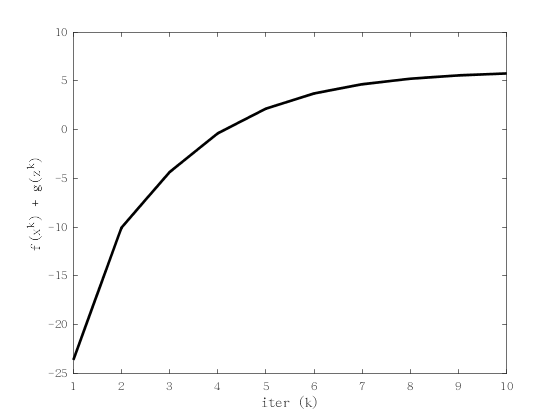

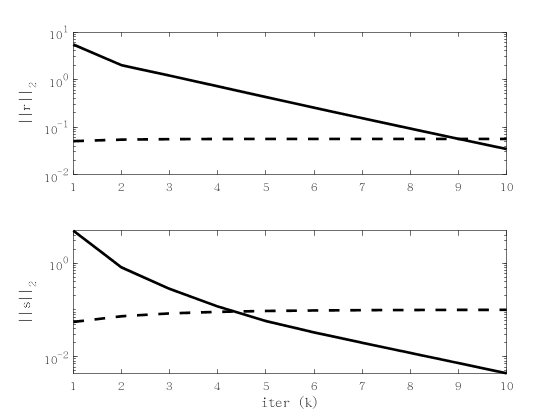

In [6]:
K = length(history.objval);

h = figure;
plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2);
ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');

g = figure;
subplot(2,1,1);
semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
    1:K, history.eps_pri, 'k--',  'LineWidth', 2);
ylabel('||r||_2');

subplot(2,1,2);
semilogy(1:K, max(1e-8, history.s_norm), 'k', ...
    1:K, history.eps_dual, 'k--', 'LineWidth', 2);
ylabel('||s||_2'); xlabel('iter (k)');